In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import os


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic
%matplotlib inline

/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dslochower/data/applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from constants import guest_types
from constants import colors
from bootstrap import bootstrap
from bootstrap import thermodynamic_bootstrap
import plotting

In [4]:
from constants import experimental_deltaG
from constants import experimental_deltaH
from constants import systems

# Calculate or load in the summary results

Perhaps I should have done this in another notebook, but I didn't think of it earlier, so it's going here.

** Nope, I actually got around to extracting this to `summarize.py`.**

In [5]:
bgbg = pd.read_csv("results/bgbg_tip3p_by_orientation.csv")
bgbg_combined = pd.read_csv("results/bgbg_tip3p_combined.csv")

bg2bg2 = pd.read_csv("results/bg2bg2_tip3p_by_orientation.csv")
bg2bg2_combined = pd.read_csv("results/bg2bg2_tip3p_combined.csv")

smirnoff = pd.read_csv("results/smirnoff_by_orientation.csv")
smirnoff_combined = pd.read_csv("results/smirnoff_combined.csv")

experimental = pd.read_csv("results/experimental.csv")

In [11]:
data_sets = [bgbg_combined, bg2bg2_combined, smirnoff_combined, experimental]
names = ["GAFF v1.7", "GAFF v2.1", "SMIRNOFF99Frosst", "Experimental"]

In [12]:
from itertools import permutations

In [213]:
delta_G_r_squared = pd.DataFrame()
delta_G_rmse = pd.DataFrame()
delta_G_mse = pd.DataFrame()

delta_H_r_squared = pd.DataFrame()
delta_H_rmse = pd.DataFrame()
delta_H_mse = pd.DataFrame()

for index_i, i in enumerate(data_sets):
    for index_j, j in enumerate(data_sets):
                    
        # This seems the most reliable way of matching keys. Took a little while to figure out,
        # even if the data frames are ordered properly.
        df = i.merge(j, on=["System"], suffixes=("_i", "_j"))    
        
        results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")


        delta_G_r_squared = delta_G_r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"],
                "R**2 SEM": results["sem"]["R**2"]
            },
            ignore_index=True,
        )

        delta_G_rmse = delta_G_rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"],
                "RMSE SEM": results["sem"]["RMSE"]
            },
            ignore_index=True,
        )

        delta_G_mse = delta_G_mse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "MSE": results["mean"]["MSE"],
                "MSE SEM": results["mean"]["MSE"]
            },
            ignore_index=True,
        )
        
        results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")
        
        delta_H_r_squared = delta_H_r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"],
                "R**2 SEM": results["sem"]["R**2"]
                
            },
            ignore_index=True,
        )

        delta_H_rmse = delta_H_rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"],
                "RMSE SEM": results["sem"]["RMSE"]
            },
            ignore_index=True,
        )

        delta_H_mse = delta_H_mse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "MSE": results["mean"]["MSE"],
                "MSE SEM": results["sem"]["MSE"]
            },
            ignore_index=True,
        )


GAFF v1.7 -- GAFF v1.7 0.9029389070340694
GAFF v1.7 -- GAFF v1.7 0.8870297123398293
GAFF v1.7 -- GAFF v2.1 0.6215628262373905
GAFF v1.7 -- GAFF v2.1 0.572614002295077
GAFF v1.7 -- SMIRNOFF99Frosst 0.7307554171130589
GAFF v1.7 -- SMIRNOFF99Frosst 0.5490067691073677
GAFF v1.7 -- Experimental 0.6092692508145672
GAFF v1.7 -- Experimental 0.3722141404358595
GAFF v2.1 -- GAFF v1.7 0.6210568793240205
GAFF v2.1 -- GAFF v1.7 0.5861026884151318
GAFF v2.1 -- GAFF v2.1 0.9743495073567466
GAFF v2.1 -- GAFF v2.1 0.9816211195742012
GAFF v2.1 -- SMIRNOFF99Frosst 0.46564359600719774
GAFF v2.1 -- SMIRNOFF99Frosst 0.5877729650633315
GAFF v2.1 -- Experimental 0.7073047040493958
GAFF v2.1 -- Experimental 0.7474048715958704
SMIRNOFF99Frosst -- GAFF v1.7 0.73337985481411
SMIRNOFF99Frosst -- GAFF v1.7 0.5500287412281553
SMIRNOFF99Frosst -- GAFF v2.1 0.47037185986904784
SMIRNOFF99Frosst -- GAFF v2.1 0.5817587262400232
SMIRNOFF99Frosst -- SMIRNOFF99Frosst 0.8875183607894953
SMIRNOFF99Frosst -- SMIRNOFF99Frosst 

In [217]:
delta_G_r_squared_pivot = delta_G_r_squared.pivot(columns="y", index="x")
delta_G_rmse_pivot = delta_G_rmse.pivot(columns="y", index="x",)
delta_G_mse_pivot = delta_G_mse.pivot(columns="y", index="x",)

delta_H_r_squared_pivot = delta_H_r_squared.pivot(columns="y", index="x", )
delta_H_rmse_pivot = delta_H_rmse.pivot(columns="y", index="x",)
delta_H_mse_pivot = delta_H_mse.pivot(columns="y", index="x", )


In [232]:
pd.options.display.float_format = '{:,.2f}'.format
delta_G_r_squared_pivot

R**2                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.94      0.61      0.71             0.53   
GAFF v1.7                0.61      0.90      0.62             0.73   
GAFF v2.1                0.71      0.62      0.97             0.47   
SMIRNOFF99Frosst         0.52      0.73      0.47             0.89   

                     R**2 SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.08      0.08      0.07             0.11  
GAFF v1.7                0.09      0.03      0.08             0.06  
GAFF v2.1                0.07      0.08      0.01             0.10  
SMIRNOFF99Frosst         0.11      0.06      0.10             0.04

In [222]:
delta_G_rmse_pivot

RMSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.21      0.93      1.58             0.82   
GAFF v1.7                0.92      0.32      2.16             0.70   
GAFF v2.1                1.58      2.16      0.24             1.89   
SMIRNOFF99Frosst         0.83      0.70      1.89             0.37   

                     RMSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.16      0.09      0.10             0.11  
GAFF v1.7                0.09      0.04      0.12             0.08  
GAFF v2.1                0.10      0.12      0.03             0.14  
SMIRNOFF99Frosst         0.11      0.08      0.14             0.05

In [223]:
delta_G_mse_pivot

MSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental            -0.00      0.61     -1.35             0.20   
GAFF v1.7               -0.61     -0.00     -1.96            -0.40   
GAFF v2.1                1.35      1.96     -0.00             1.54   
SMIRNOFF99Frosst        -0.20      0.41     -1.55             0.00   

                      MSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental            -0.00      0.61     -1.35             0.20  
GAFF v1.7               -0.61     -0.00     -1.96            -0.40  
GAFF v2.1                1.35      1.96     -0.00             1.54  
SMIRNOFF99Frosst        -0.20      0.41     -1.55             0.00

In [224]:
delta_H_r_squared_pivot

R**2                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.99      0.37      0.74             0.41   
GAFF v1.7                0.37      0.89      0.57             0.55   
GAFF v2.1                0.75      0.59      0.98             0.59   
SMIRNOFF99Frosst         0.41      0.55      0.58             0.91   

                     R**2 SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.01      0.11      0.08             0.12  
GAFF v1.7                0.11      0.05      0.11             0.12  
GAFF v2.1                0.08      0.10      0.01             0.09  
SMIRNOFF99Frosst         0.12      0.11      0.10             0.04

In [226]:
delta_H_rmse_pivot

RMSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.14      2.05      2.52             1.73   
GAFF v1.7                2.05      0.66      3.65             1.87   
GAFF v2.1                2.50      3.66      0.36             2.71   
SMIRNOFF99Frosst         1.72      1.88      2.72             0.67   

                     RMSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.06      0.21      0.24             0.22  
GAFF v1.7                0.21      0.13      0.20             0.21  
GAFF v2.1                0.24      0.20      0.04             0.21  
SMIRNOFF99Frosst         0.21      0.20      0.21             0.11

In [227]:
delta_H_mse_pivot

MSE                                       \
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst   
x                                                                    
Experimental             0.00      1.19     -2.04             0.06   
GAFF v1.7               -1.19     -0.00     -3.20            -1.12   
GAFF v2.1                2.02      3.22     -0.00             2.08   
SMIRNOFF99Frosst        -0.07      1.12     -2.10            -0.00   

                      MSE SEM                                       
y                Experimental GAFF v1.7 GAFF v2.1 SMIRNOFF99Frosst  
x                                                                   
Experimental             0.00      1.19     -2.04             0.06  
GAFF v1.7               -1.19     -0.00     -3.20            -1.12  
GAFF v2.1                2.02      3.22     -0.00             2.08  
SMIRNOFF99Frosst        -0.07      1.12     -2.10            -0.00

Text(0.5,1,'$\\Delta G$: MSE cross correlation')

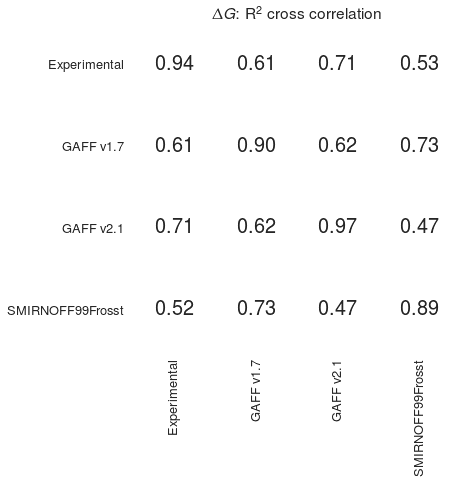

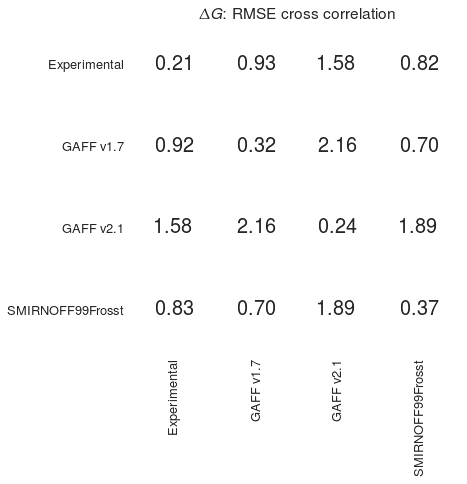

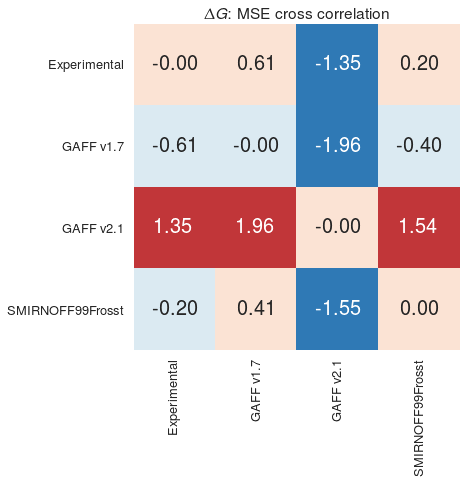

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_r_squared_pivot["R**2"], annot=True, fmt=".2f", square=True, ax=ax, 
            cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_rmse_pivot["RMSE"], annot=True, fmt=".2f", square=True, ax=ax,
            cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: RMSE cross correlation")


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_G_mse_pivot["MSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.color_palette("RdBu_r"), cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta G$: MSE cross correlation")

Text(0.5,1,'$\\Delta H$: MSE cross correlation')

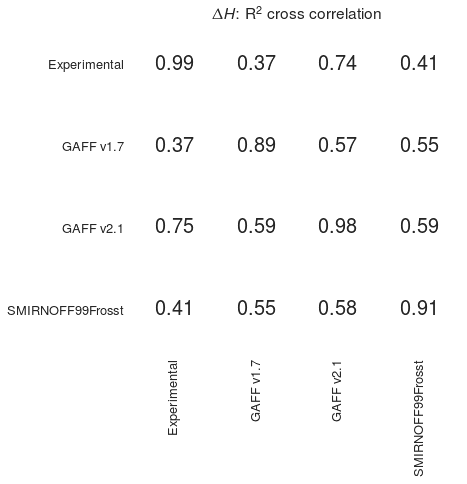

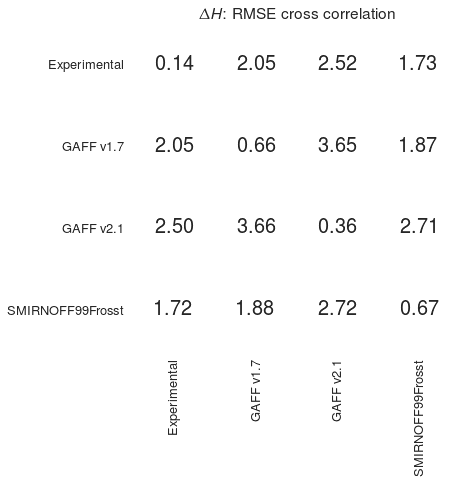

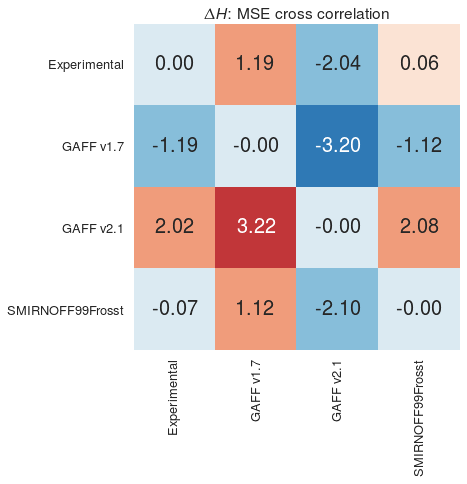

In [238]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_r_squared_pivot["R**2"], annot=True, fmt=".2f", square=True, ax=ax, cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_rmse_pivot["RMSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=ListedColormap(['white']), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: RMSE cross correlation")


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(delta_H_mse_pivot["MSE"], annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.color_palette("RdBu_r"), 
            cbar=False, annot_kws={"size": 20})
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: MSE cross correlation")

In [182]:
r_squared = pd.DataFrame()
rmse = pd.DataFrame()

for index_i, i in enumerate(data_sets):
    for index_j, j in enumerate(data_sets):
                    
        # This seems the most reliable way of matching keys. Took a little while to figure out,
        # even if the data frames are ordered properly.
        df = i.merge(j, on=["System"], suffixes=("_i", "_j"))    
            
        results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=1000)
        print(f"{names[index_i]} -- {names[index_j]} {results['mean']['R**2']}")
        
        
        r_squared = r_squared.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "R**2": results["mean"]["R**2"]
            },
            ignore_index=True,
        )
        
        rmse = rmse.append(
            {
                "x": names[index_i],
                "y": names[index_j],
                "RMSE": results["mean"]["RMSE"]
            },
            ignore_index=True,
        )


GAFF v1.7 -- GAFF v1.7 0.8883780208139701
GAFF v1.7 -- GAFF v2.1 0.5748982604030785
GAFF v1.7 -- SMIRNOFF99Frosst 0.5527055204696476
GAFF v1.7 -- Experimental 0.36846787704417466
GAFF v2.1 -- GAFF v1.7 0.577647987050691
GAFF v2.1 -- GAFF v2.1 0.9816885288580764
GAFF v2.1 -- SMIRNOFF99Frosst 0.5847027605326159
GAFF v2.1 -- Experimental 0.7454015773386664
SMIRNOFF99Frosst -- GAFF v1.7 0.5506907668622799
SMIRNOFF99Frosst -- GAFF v2.1 0.5877133603941203
SMIRNOFF99Frosst -- SMIRNOFF99Frosst 0.9091473775422225
SMIRNOFF99Frosst -- Experimental 0.41223823153178313
Experimental -- GAFF v1.7 0.36885966081322624
Experimental -- GAFF v2.1 0.7471081263071817
Experimental -- SMIRNOFF99Frosst 0.4140404457705174
Experimental -- Experimental 0.9918994930777664


In [183]:
r_squared_pivot = r_squared.pivot(columns="y", index="x", values="R**2")
rmse_pivot = rmse.pivot(columns="y", index="x", values="RMSE")

Text(0.5,1,'$\\Delta H$: RMSE cross correlation')

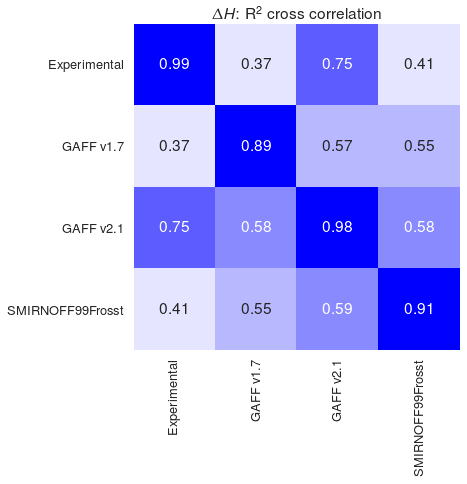

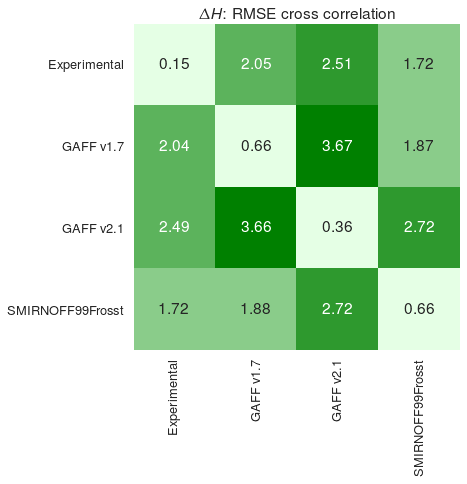

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(r_squared_pivot, annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.light_palette("blue"), cbar=False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: R$^2$ cross correlation")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(rmse_pivot, annot=True, fmt=".2f", square=True, ax=ax, cmap=sns.light_palette("green"), cbar=False)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("$\Delta H$: RMSE cross correlation")

In [36]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)


In [7]:
def pretty_print(results):
    print(f"{results['mean']['RMSE']:2.2f} ± {results['sem']['RMSE']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['MSE']:2.2f} ± {results['sem']['MSE']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['R**2']:2.2f} ± {results['sem']['R**2']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['slope']:2.2f} ± {results['sem']['slope']:2.2f}", end="")
    print("\n", end="")
    print(f"{results['mean']['intercept']:2.2f} ± {results['sem']['intercept']:2.2f}", end="")


pretty_print(results)

NameError: name 'results' is not defined

In [40]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)
pretty_print(results)

0.92 ± 0.09
0.61 ± 0.11
0.61 ± 0.09
0.77 ± 0.10
-0.08 ± 0.30

In [41]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta G_i"], df["G_SEM_i"], df["Delta G_j"], df["G_SEM_j"], cycles=10000)
pretty_print(results)

1.58 ± 0.10
-1.35 ± 0.13
0.71 ± 0.07
1.19 ± 0.12
-0.79 ± 0.38

In [43]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

1.71 ± 0.22
0.06 ± 0.26
0.41 ± 0.12
0.81 ± 0.17
-0.39 ± 0.54

In [44]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

2.05 ± 0.21
1.19 ± 0.26
0.37 ± 0.11
0.70 ± 0.17
0.47 ± 0.57

In [45]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["Delta H_i"], df["H_SEM_i"], df["Delta H_j"], df["H_SEM_j"], cycles=10000)
pretty_print(results)

2.50 ± 0.23
-2.02 ± 0.23
0.74 ± 0.08
1.35 ± 0.13
-1.13 ± 0.42

# Entropy

In [6]:
smirnoff_combined["-TdS"] = smirnoff_combined["Delta G"] - smirnoff_combined["Delta H"]
smirnoff_combined["-TdS_SEM"] = np.sqrt(smirnoff_combined["G_SEM"]**2 + smirnoff_combined["H_SEM"]**2)

bgbg_combined["-TdS"] = bgbg_combined["Delta G"] - bgbg_combined["Delta H"]
bgbg_combined["-TdS_SEM"] = np.sqrt(bgbg_combined["G_SEM"]**2 + bgbg_combined["H_SEM"]**2)

bg2bg2_combined["-TdS"] = bg2bg2_combined["Delta G"] - bg2bg2_combined["Delta H"]
bg2bg2_combined["-TdS_SEM"] = np.sqrt(bg2bg2_combined["G_SEM"]**2 + bg2bg2_combined["H_SEM"]**2)

experimental["-TdS"] = experimental["Delta G"] - experimental["Delta H"]
experimental["-TdS_SEM"] = np.sqrt(experimental["G_SEM"]**2 + experimental["H_SEM"]**2)

In [11]:
df = experimental.merge(bgbg_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

1.68 ± 0.20
-0.58 ± 0.25
0.37 ± 0.14
0.74 ± 0.19
-0.72 ± 0.19

In [13]:
df = experimental.merge(smirnoff_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

1.68 ± 0.22
0.14 ± 0.25
0.38 ± 0.12
0.83 ± 0.19
0.04 ± 0.23

In [14]:
df = experimental.merge(bg2bg2_combined, on=["System"], suffixes=("_i", "_j"))    
results = bootstrap(df["-TdS_i"], df["-TdS_SEM_i"], df["-TdS_j"], df["-TdS_SEM_j"], cycles=10000)
pretty_print(results)

1.43 ± 0.25
0.67 ± 0.20
0.59 ± 0.13
0.99 ± 0.15
0.67 ± 0.19